# Taxi Trip Linear Regression

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict, RandomizedSearchCV, StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, SelectKBest

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [2]:
df = pd.read_csv("nyctaximodnorm.csv")

In [4]:
df.head()

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.00,0.54,0.49,0.45,0.53,844.00
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.29,0.60,0.66,0.67,1560.00
2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.17,0.16,0.25,0.24,0.28,432.00
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.71,0.62,0.00,0.57,1003.00
4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1.00,0.37,0.34,0.34,0.40,480.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19692 entries, 0 to 19691
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vendorid2                 19692 non-null  int64  
 1   paymenttype1              19692 non-null  int64  
 2   paymenttype2              19692 non-null  int64  
 3   pulocationid237           19692 non-null  int64  
 4   pulocationid161           19692 non-null  int64  
 5   pulocationid236           19692 non-null  int64  
 6   pulocationid186           19692 non-null  int64  
 7   pulocationid162           19692 non-null  int64  
 8   dolocationid161           19692 non-null  int64  
 9   dolocationid236           19692 non-null  int64  
 10  dolocationid237           19692 non-null  int64  
 11  dolocationid230           19692 non-null  int64  
 12  dolocationid170           19692 non-null  int64  
 13  tpeppickupdatetimehour0   19692 non-null  int64  
 14  tpeppi

In [6]:
df.dtypes.value_counts()

int64      19
float64     6
dtype: int64

In [7]:
# Descriptive Statistical Analysis
df.describe(include="all")

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
count,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00
mean,0.56,0.67,0.33,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.18,0.40,0.39,0.17,0.40,0.40,0.27,0.30,0.37,0.22,0.39,693.83
std,0.50,0.47,0.47,0.20,0.20,0.19,0.19,0.19,0.20,0.19,0.19,0.18,0.18,0.38,0.49,0.49,0.38,0.49,0.49,0.21,0.20,0.17,0.21,0.17,423.59
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.15,0.23,0.00,0.27,367.00
50%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.24,0.32,0.21,0.36,600.00
75%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.33,0.39,0.45,0.35,0.49,909.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2535.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
count,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00,19692.00
mean,0.56,0.67,0.33,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.18,0.40,0.39,0.17,0.40,0.40,0.27,0.30,0.37,0.22,0.39,693.83
std,0.50,0.47,0.47,0.20,0.20,0.19,0.19,0.19,0.20,0.19,0.19,0.18,0.18,0.38,0.49,0.49,0.38,0.49,0.49,0.21,0.20,0.17,0.21,0.17,423.59
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.15,0.23,0.00,0.27,367.00
50%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.24,0.32,0.21,0.36,600.00
75%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.33,0.39,0.45,0.35,0.49,909.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2535.00


In [9]:
df.shape

(19692, 25)

In [10]:
df.columns

Index(['vendorid2', 'paymenttype1', 'paymenttype2', 'pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162', 'dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170', 'tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2', 'tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2', 'passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount', 'duration'], dtype='object')

***

## Create a small dataset

In [11]:
df = df.sample(frac=0.25)

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.head()

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.18,0.23,0.00,0.22,331.00
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.11,0.19,0.16,0.22,180.00
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.39,0.43,0.00,0.40,803.00
3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0.17,0.23,0.40,0.40,0.48,840.00
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.40,0.55,0.54,0.63,1277.00


In [14]:
df.shape

(4923, 25)

##  Linear Regression 

Let's first understand what exactly `Regression` means it is a statistical method used in finance, investing, and other disciplines that attempts to determine the `strength` and `character` of the relationship between one `dependent variable` (usually denoted by `Y`) and a series of other variables known as `independent variables`.   
`Linear Regression` is a statistical technique where based on a set of `independent variable(s)` a dependent variable is `predicted`. 

$$\huge y_{i} =\beta _{0} + \beta _{1} X_{i} + \varepsilon_{i}$$

y = dependent variable     
$ \beta_{0}$ = population of intercept    
$ \beta_{i}$ = population of co-efficient   
x = independent variable    
$ \varepsilon_{i}$ = Random error   


## Simple Linear Regression (StatsModel)

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets `[[]]`, and listing the names of the columns of interest.

In [15]:
df

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.18,0.23,0.00,0.22,331.00
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.11,0.19,0.16,0.22,180.00
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.39,0.43,0.00,0.40,803.00
3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0.17,0.23,0.40,0.40,0.48,840.00
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.40,0.55,0.54,0.63,1277.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.67,0.14,0.21,0.00,0.24,350.00
4919,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.24,0.40,0.00,0.38,848.00
4920,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.89,0.89,0.80,0.94,1680.00
4921,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.83,0.13,0.34,0.40,0.40,777.00


In [16]:
df.columns

Index(['vendorid2', 'paymenttype1', 'paymenttype2', 'pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162', 'dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170', 'tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2', 'tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2', 'passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount', 'duration'], dtype='object')

In [17]:
## X is the input variables (or independent variables)
X = df['totalamount']
## y is the target/dependent variable
y = df['duration']

In [18]:
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

In [19]:
lrmodel = sm.OLS(y,X).fit()

In [20]:
lrprediction = lrmodel.predict(X)

In [21]:
lrprediction[0:5]

0    294.30
1    294.30
2    702.88
3    884.89
4   1242.21
dtype: float64

In [22]:
prediction = pd.DataFrame(data=lrprediction, columns=['predicted'])
prediction

,predicted
0,294.30
1,294.30
2,702.88
3,884.89
4,1242.21
...,...
4918,331.44
4919,665.74
4920,1954.63
4921,699.17


In [23]:
# Print out the statistics
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 2.341e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:52:28   Log-Likelihood:                -32514.
No. Observations:                4923   AIC:                         6.503e+04
Df Residuals:                    4921   BIC:                         6.505e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -210.8617      6.485    -32.516      0.000    -223.575    -198.148
totalamount  2299.9574     15.031    153.012      0.000    2270.489    2329.425
==============================================================================
Omnibus:                      456.952   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3272.873
Skew:                          -0.042   Prob(JB):                         0.00
Kurtosis:                       6.994   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is more than the alpha (α) level = 0.05, so we fail to reject the null hypothesis. The coefficient -11.53 means that VendorID2 get 11.53 scores less.

### 2nd method

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

Lastly, you can build the simple linear regression model in `statsmodels` using the `ols()` function. You can import the `ols()` function directly using the line of code below.

Then, you can plug in the `ols_formula` and `ols_data` as arguments in the `ols()` function. After you save the results as a variable, you can call on the `fit()` function to actually fit the model to the data.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols()` function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.

`linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()`


Write out OLS formula as a string:

`
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"
`

## Model evaluation and interpretation

Lastly, you can call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output.

Use the `.summary()` function to get a summary table of model results and statistics.

Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We'll focus on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

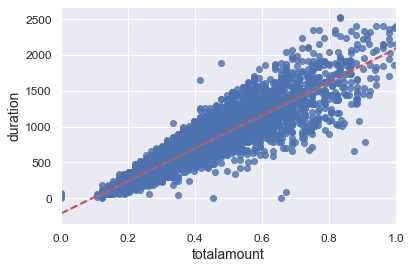

In [24]:
sns.regplot(x=df.totalamount, y=df.duration, data=df, line_kws={"lw": 2, 'linestyle':'--','color': 'r'})
plt.show()

In [25]:
#lm = ols('duration ~ totalamount', data = df).fit()

In [26]:
#lm.summary()

### Explain the Statistics

Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.

Method : Least Squares : Fit data to the model by minimizing the residual samples

R-squared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated. 

Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.

F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means. 

Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.

Log-Likelihood : The conditional probability that the observed data fits the model

AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.

Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.

BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.

Df Model : Number of parameters in the model

Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.

Independent Coefficient : Represents the change of the independent variable per unit.

Standard Error : Accuracy of the coefficients

P>|t| : The P Value. A P Value less than .05 is considered statistically significant.

[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.

Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.

Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated. 

Prob(Omnibus) : Probability of Omnibus

Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution. 

Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.

Prob(JB) : The probability of Jarque-Bera

Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.

Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.

### Residual Plots

For a quick check of all the regressors, you can use plot_partregress_grid. These plots will not label the points, but you can use them to identify problems and then use plot_partregress to get more information.
```
sm.graphics.plot_partregress(
                             endog='prestige', # response
                             exog_i='income', # variable of interest
                             exog_others=['education'], # other predictors
                             data=df,  # dataframe
                             obs_labels=True # show labels
                             );
```

eval_env: 1


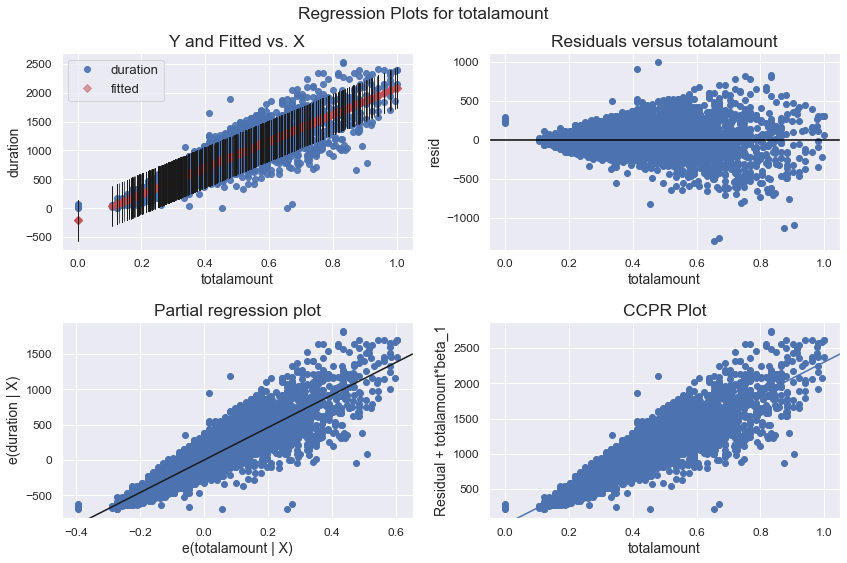

In [27]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lrmodel, 'totalamount', fig=fig)

<Figure size 864x576 with 0 Axes>

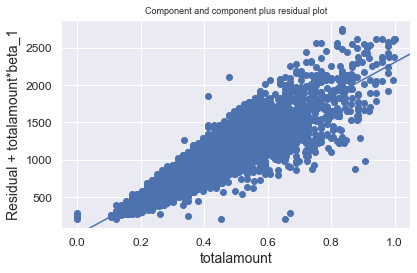

In [28]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_ccpr(lrmodel, "totalamount")
plt.tight_layout(pad=1.0)
plt.show()

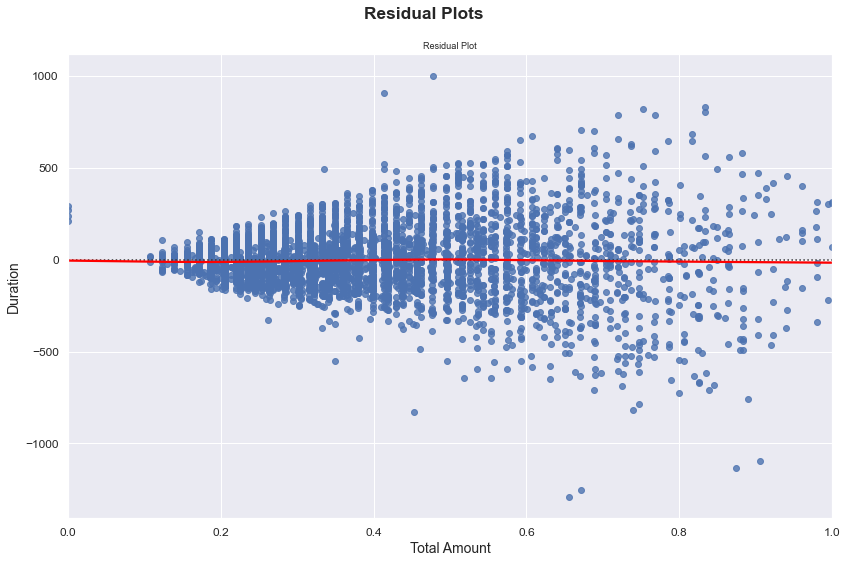

In [30]:
fig, ax = plt.subplots(figsize=(12,8))

fig.suptitle('Residual Plots', weight='bold')

sns.residplot(data=df, x="totalamount", y="duration", x_partial=None, y_partial=None, 
                  lowess=True, order=1, robust=False, dropna=True, label=None, 
                  color=None, scatter_kws=None, line_kws={'color': 'red'}, ax=None)

ax.set_title('Residual Plot')
ax.set_xlabel('Total Amount')
ax.set_ylabel('Duration')

fig.tight_layout()
plt.show()

***

## Check model assumptions (Statsmodel)

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected above with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

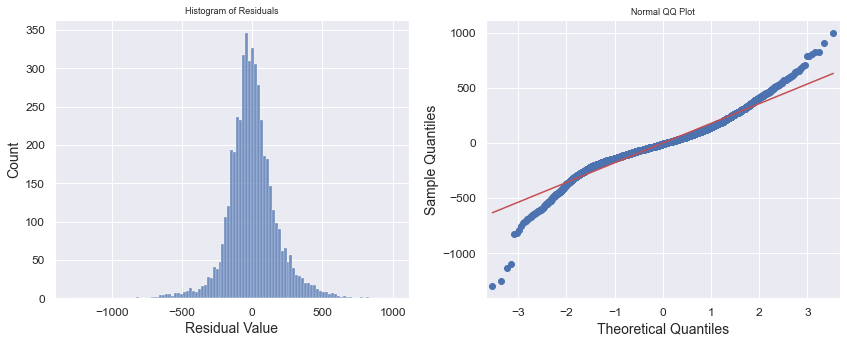

In [31]:
# Calculate the residuals.

### YOUR CODE HERE ### 

residuals = lrmodel.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (12,5))

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

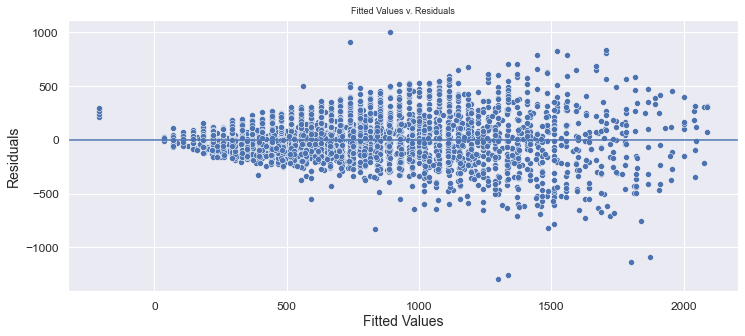

In [32]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 

plt.figure(figsize=(12,5))

fig = sns.scatterplot(x = lrmodel.fittedvalues, y = lrmodel.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

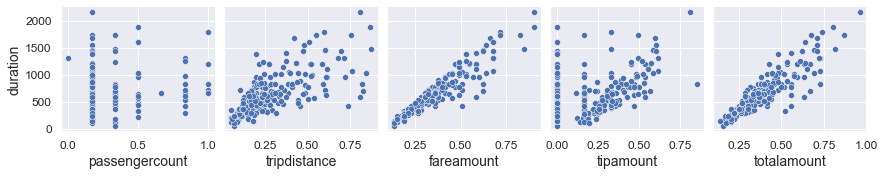

In [33]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(df.sample(200), x_vars=['passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount'],
            y_vars=['duration'])

plt.show()

In [34]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

# Create a subset of the data with the continous independent variables. 
X = df[['passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount','duration']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
passengercount,2.48
tripdistance,24.22
fareamount,853.76
tipamount,15.50
totalamount,628.77
duration,53.57


***

## Simple Linear Regression (Scikit Learn)

<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$

<b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [35]:
df.head()

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.18,0.23,0.00,0.22,331.00
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.11,0.19,0.16,0.22,180.00
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.39,0.43,0.00,0.40,803.00
3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0.17,0.23,0.40,0.40,0.48,840.00
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.40,0.55,0.54,0.63,1277.00


In [36]:
X = df[['totalamount']]
y = df[['duration']]

In [37]:
X.values, y.values

(array([[0.21963824],
        [0.21963824],
        [0.39728682],
        ...,
        [0.94153747],
        [0.39567183],
        [0.44573643]]),
 array([[ 331.],
        [ 180.],
        [ 803.],
        ...,
        [1680.],
        [ 777.],
        [ 606.]]))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3938, 1), (985, 1), (3938, 1), (985, 1))

In [40]:
lr = LinearRegression()
lr

LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
lr_pred = lr.predict(X_test)
lr_pred[0:5]  

array([[855.23704382],
       [701.71455532],
       [645.54779124],
       [485.28529105],
       [593.12547809]])

In [43]:
lr.intercept_

array([-215.67592471])

In [44]:
lr.coef_

array([[2318.56402138]])

In [45]:
prediction = pd.DataFrame(data=lr_pred, columns=['predicted'])
prediction

,predicted
0,855.24
1,701.71
2,645.55
3,485.29
4,593.13
...,...
980,218.68
981,331.01
982,1154.79
983,443.35


In [46]:
y_test.reset_index(drop=True, inplace=True)
y_test

,duration
0,1144.00
1,600.00
2,781.00
3,434.00
4,297.00
...,...
980,248.00
981,360.00
982,1200.00
983,360.00


In [47]:
tableslr = pd.concat([y_test, prediction], axis=1)
tableslr

,duration,predicted
0,1144.00,855.24
1,600.00,701.71
2,781.00,645.55
3,434.00,485.29
4,297.00,593.13
...,...,...
980,248.00,218.68
981,360.00,331.01
982,1200.00,1154.79
983,360.00,443.35


### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

### How do we determine the best fit line?

The line for which the the `error` between the `predicted values` and the `observed values` is minimum is called the `best fit line` or `the regression line`. These errors are also called as `residuals`. The residuals can be visualized by the vertical lines from the observed data value to the `regression line`.

### Regression Evaluation Metrics 


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the `absolute value of the errors`:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the `squared errors`:

$${\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Root Mean Squared Error** (RMSE) is the square root of the `mean of the squared errors`:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to `understand`, because it's the `average error`.
- **MSE** is more popular than MAE, because MSE `"punishes"` larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is `interpretable in the "y" units`.

All of these are **loss functions**, because we want to minimize them.

### Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [48]:
mae = mean_absolute_error(y_test,lr_pred)
mae

122.19719188844084

In [49]:
mse = mean_squared_error(y_test,lr_pred)
mse

30148.565967483926

In [50]:
rmse = np.sqrt(mse)
rmse

173.63342410804415

In [51]:
r2score = r2_score(y_test,lr_pred)
r2score

0.8245857539939178

In [52]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
X.shape

(4923, 1)

In [53]:
# Number of observations is the shape along axis 0
n = X.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X.shape[1]

In [54]:
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2score)*(n-1)/(n-p-1)
adjusted_r2

0.8245501079370176

In [55]:
lr.score(X, y)

0.8262291537669046

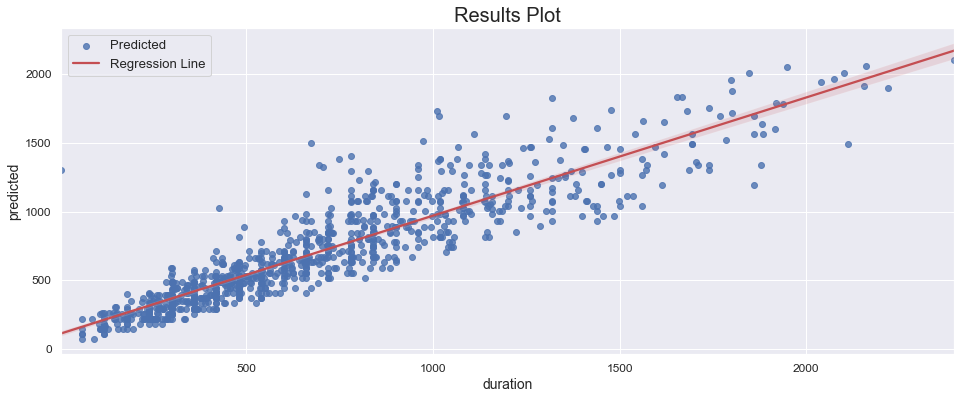

In [58]:
fig, ax = plt.subplots(figsize=(16,6))

sns.regplot(x=tableslr.duration, y=tableslr.predicted, data=tableslr, line_kws={"color":"r"})
ax.set_title("Results Plot", size=20)
ax.legend(['Predicted','Regression Line'])
plt.show()

***

# Multiple Linear Regression 
It(as the name suggests) is characterized by `multiple independent variables` (more than `1`). While you discover the simplest `fit line`, you'll be able to adjust a `polynomial or regression` toward the `mean`. And these are called `polynomial or regression` toward the `mean`.

In [59]:
corrmat = df.corr()
corrmat

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
vendorid2,1.00,-0.03,0.04,-0.01,0.02,-0.02,-0.01,-0.00,0.01,-0.01,0.01,0.03,0.01,-0.01,-0.00,0.01,-0.01,-0.00,0.01,0.27,-0.02,-0.04,-0.04,-0.04,-0.04
paymenttype1,-0.03,1.00,-0.99,-0.01,-0.01,0.02,-0.04,0.03,-0.04,-0.01,-0.04,-0.02,0.00,0.02,-0.06,0.04,0.02,-0.05,0.04,-0.04,0.07,0.05,0.74,0.23,0.04
paymenttype2,0.04,-0.99,1.00,-0.00,0.01,-0.01,0.05,-0.03,0.04,0.01,0.03,0.02,-0.00,-0.03,0.05,-0.03,-0.02,0.05,-0.03,0.04,-0.07,-0.05,-0.73,-0.22,-0.03
pulocationid237,-0.01,-0.01,-0.00,1.00,-0.04,-0.04,-0.04,-0.04,0.02,0.14,0.12,-0.02,-0.02,-0.04,0.05,-0.00,-0.04,0.04,0.00,-0.03,-0.06,-0.06,-0.02,-0.06,-0.05
pulocationid161,0.02,-0.01,0.01,-0.04,1.00,-0.04,-0.04,-0.04,0.02,-0.00,0.03,0.02,0.02,-0.04,0.01,0.02,-0.03,0.00,0.02,-0.00,-0.03,-0.02,-0.01,-0.02,0.00
pulocationid236,-0.02,0.02,-0.01,-0.04,-0.04,1.00,-0.04,-0.04,0.01,0.10,0.07,-0.02,-0.03,-0.00,0.04,-0.03,-0.00,0.04,-0.03,-0.00,-0.04,-0.04,-0.00,-0.04,-0.04
pulocationid186,-0.01,-0.04,0.05,-0.04,-0.04,-0.04,1.00,-0.04,0.03,-0.04,-0.03,0.06,0.05,0.01,0.02,-0.02,0.01,0.01,-0.02,-0.00,-0.01,0.02,-0.01,0.01,0.04
pulocationid162,-0.00,0.03,-0.03,-0.04,-0.04,-0.04,-0.04,1.00,-0.01,0.01,0.05,-0.00,0.03,-0.02,-0.00,0.02,-0.03,0.00,0.03,0.00,-0.01,-0.01,0.02,0.00,-0.00
dolocationid161,0.01,-0.04,0.04,0.02,0.02,0.01,0.03,-0.01,1.00,-0.04,-0.04,-0.03,-0.04,0.05,0.03,-0.07,0.04,0.04,-0.07,0.01,-0.06,-0.01,-0.04,-0.03,0.02
dolocationid236,-0.01,-0.01,0.01,0.14,-0.00,0.10,-0.04,0.01,-0.04,1.00,-0.04,-0.04,-0.04,-0.04,0.06,-0.01,-0.04,0.05,-0.01,0.00,-0.04,-0.05,-0.04,-0.06,-0.05


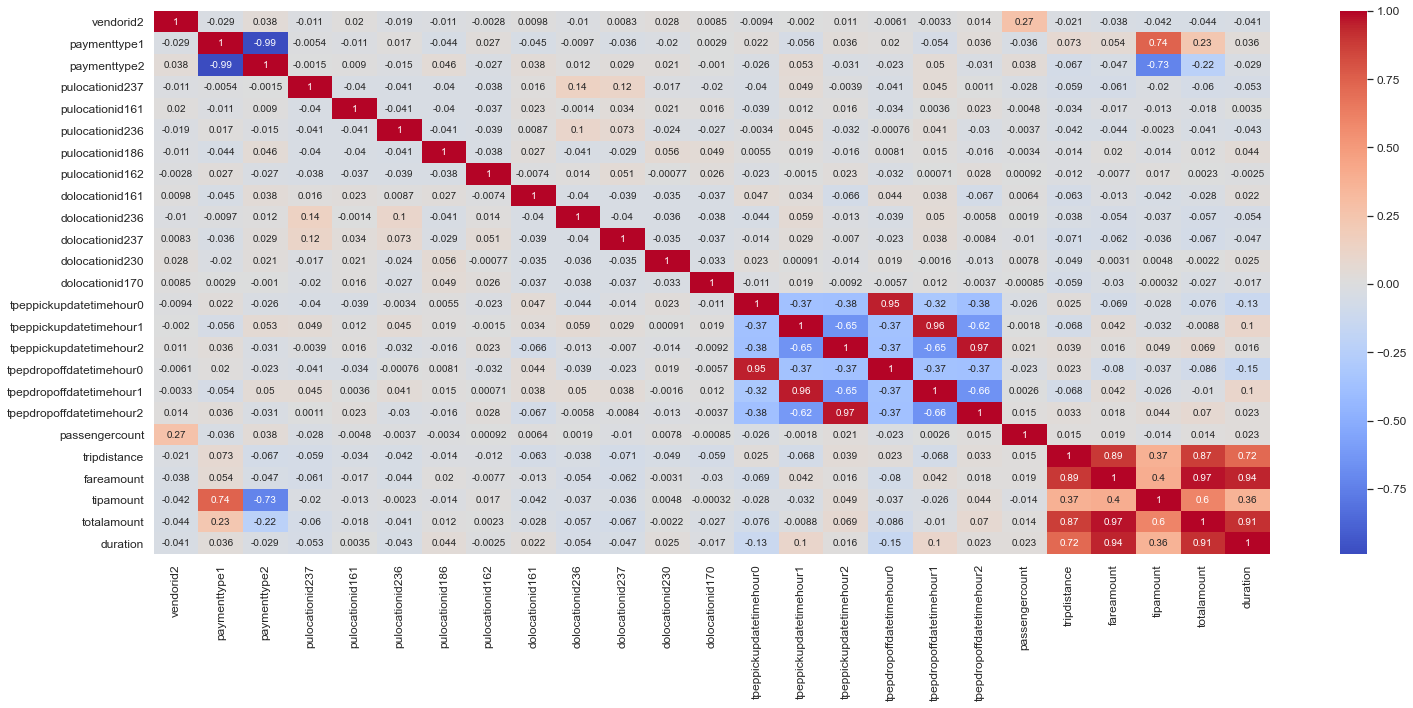

In [60]:
plt.subplots(figsize=(25,10))
sns.heatmap(corrmat, annot=True, annot_kws= {'size':10 }, cmap="coolwarm")
plt.show()

## Multiple Linear Regression (StatsModel)

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets `[[]]`, and listing the names of the columns of interest.

In [61]:
df.head()

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.18,0.23,0.00,0.22,331.00
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.11,0.19,0.16,0.22,180.00
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.39,0.43,0.00,0.40,803.00
3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0.17,0.23,0.40,0.40,0.48,840.00
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.40,0.55,0.54,0.63,1277.00


In [62]:
df.columns

Index(['vendorid2', 'paymenttype1', 'paymenttype2', 'pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162', 'dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170', 'tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2', 'tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2', 'passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount', 'duration'], dtype='object')

In [63]:
y = df[['duration']]
X = df[['paymenttype1', 'paymenttype2', 
        'pulocationid161', 'pulocationid186',
        'dolocationid170', 
        'tpeppickupdatetimehour1',
        'tpepdropoffdatetimehour2', 
        'tripdistance', 'fareamount']]

In [64]:
X = sm.add_constant(X)

In [65]:
mlrmodel = sm.OLS(y,X).fit()

In [66]:
mlrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.444e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:57:17   Log-Likelihood:                -28669.
No. Observations:                4923   AIC:                         5.736e+04
Df Residuals:                    4913   BIC:                         5.742e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -259.6534     16.918    -15.348      0.000    -292.820    -226.487
paymenttype1               -33.0441     16.821     -1.964      0.050     -66.020      -0.068
paymenttype2               -32.9470     16.876     -1.952      0.051     -66.032       0.138
pulocationid161             18.9241      6.155      3.075      0.002       6.857      30.991
pulocationid186             17.2136      6.064      2.839      0.005       5.326      29.101
dolocationid170            -19.9965      6.457     -3.097      0.002     -32.655      -7.338
tpeppickupdatetimehour1     14.6258      3.165      4.621      0.000       8.421      20.831
tpepdropoffdatetimehour2    23.3852      3.064      7.633      0.000      17.379      29.391
tripdistance             -1245.2389     13.241    -94.043      0.000   -1271.198   -1219.280
fareamount                3656.5909     15.522    235.571      0.000    3626.160    3687.021
==============================================================================
Omnibus:                     7942.383   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16761499.867
Skew:                          -9.977   Prob(JB):                         0.00
Kurtosis:                     288.159   Cond. No.                         36.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

## Multiple Linear Regression (Scikit Learn)

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

The equation is given by:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


In [67]:
df.shape

(4923, 25)

In [68]:
df.head()

,vendorid2,paymenttype1,paymenttype2,pulocationid237,pulocationid161,pulocationid236,pulocationid186,pulocationid162,dolocationid161,dolocationid236,dolocationid237,dolocationid230,dolocationid170,tpeppickupdatetimehour0,tpeppickupdatetimehour1,tpeppickupdatetimehour2,tpepdropoffdatetimehour0,tpepdropoffdatetimehour1,tpepdropoffdatetimehour2,passengercount,tripdistance,fareamount,tipamount,totalamount,duration
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.18,0.23,0.00,0.22,331.00
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.11,0.19,0.16,0.22,180.00
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.17,0.39,0.43,0.00,0.40,803.00
3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0.17,0.23,0.40,0.40,0.48,840.00
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.17,0.40,0.55,0.54,0.63,1277.00


In [69]:
X = df.iloc[:,0:24]
y = df.iloc[:,24]

In [70]:
X.values, y.values

(array([[1.        , 0.        , 1.        , ..., 0.22641509, 0.        ,
         0.21963824],
        [0.        , 1.        , 0.        , ..., 0.18867925, 0.16420361,
         0.21963824],
        [1.        , 0.        , 1.        , ..., 0.43396226, 0.        ,
         0.39728682],
        ...,
        [0.        , 1.        , 0.        , ..., 0.88679245, 0.79638752,
         0.94153747],
        [1.        , 1.        , 0.        , ..., 0.33962264, 0.40229885,
         0.39567183],
        [1.        , 1.        , 0.        , ..., 0.43396226, 0.16420361,
         0.44573643]]),
 array([ 331.,  180.,  803., ..., 1680.,  777.,  606.]))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3938, 24), (985, 24), (3938,), (985,))

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
lr_pred = lr.predict(X_test)
lr_pred[0:5]

array([1139.68440273,  556.29034545,  682.00523044,  431.0596212 ,
        393.52272414])

In [76]:
lr.intercept_

-242.34087583426083

In [77]:
lr.coef_

array([    2.96108222,   -40.61188794,   -42.47945031,    -2.05392328,
          19.86077822,    -5.65596726,    19.30787253,    -0.3712242 ,
           7.59595722,     4.42845665,     6.24327938,     0.78676236,
         -24.90755999,     0.19842554,    13.83774295,    -0.16688174,
          -9.14051514,    -9.66965598,    17.67707997,     8.79134501,
       -1256.91081022,  3842.83084893,    32.44226898,  -194.63753105])

### Linear Regression Evaluation

In [78]:
mse = mean_squared_error(y_test,lr_pred)
mse

8497.921926448354

In [79]:
rmse = np.sqrt(mse)
rmse

92.18417394785482

In [80]:
r2score = r2_score(y_test,lr_pred)
r2score

0.9505563027789048

In [81]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
X.shape

(4923, 24)

In [82]:
# Number of observations is the shape along axis 0
n = X.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X.shape[1]

In [83]:
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2score)*(n-1)/(n-p-1)
adjusted_r2

0.9503140306814556

In [84]:
lr.score(X_train, y_train)

0.9665935922406462

In [85]:
lr.score(X_test, y_test)

0.9505563027789048

In [86]:
prediction = pd.DataFrame(data=lr_pred, columns=['predicted'])
prediction

,predicted
0,1139.68
1,556.29
2,682.01
3,431.06
4,393.52
...,...
980,311.56
981,339.83
982,1221.06
983,360.20


In [87]:
y_test.reset_index(drop=True, inplace=True)
y_test

0     1144.00
1      600.00
2      781.00
3      434.00
4      297.00
        ...  
980    248.00
981    360.00
982   1200.00
983    360.00
984    360.00
Name: duration, Length: 985, dtype: float64

In [88]:
tablesmlr = pd.concat([y_test, prediction], axis=1)
tablesmlr

,duration,predicted
0,1144.00,1139.68
1,600.00,556.29
2,781.00,682.01
3,434.00,431.06
4,297.00,393.52
...,...,...
980,248.00,311.56
981,360.00,339.83
982,1200.00,1221.06
983,360.00,360.20


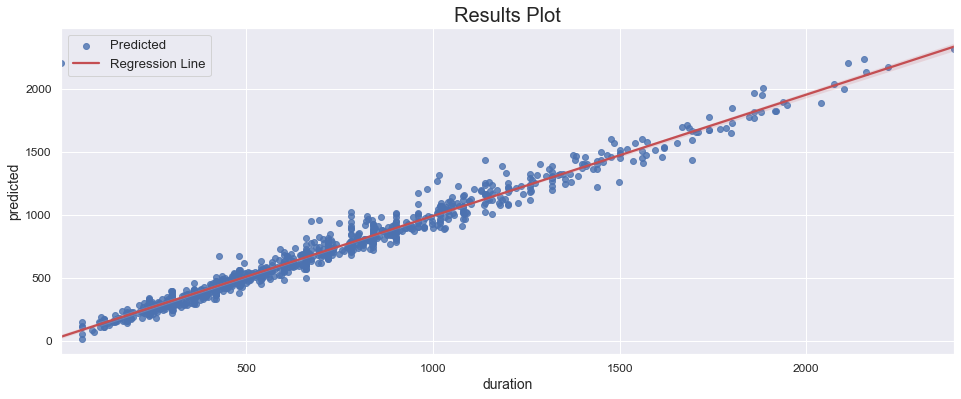

In [89]:
fig, ax = plt.subplots(figsize=(16,6))

sns.regplot(x=tablesmlr.duration, y=tablesmlr.predicted, data=tablesmlr, line_kws={"color":"r"})
ax.set_title("Results Plot", size=20)
ax.legend(['Predicted','Regression Line'])
plt.show()

## Feature selection

### f_regression - Univariate linear regression tests returning F-statistic and p-values

In [90]:
# We will look into: f_regression
# f_regression finds the F-statistics for the *simple* regressions created with each of the independent variables
# In our case, this would mean running a simple linear regression on GPA where SAT is the independent variable
# and a simple linear regression on GPA where Rand 1,2,3 is the indepdent variable
# The limitation of this approach is that it does not take into account the mutual effect of the two features
f_regression(X,y)

# There are two output arrays
# The first one contains the F-statistics for each of the regressions
# The second one contains the p-values of these F-statistics

(array([    8.20210918,     6.26581635,     4.09364554,    14.05515183,
            0.06026876,     9.10816303,     9.67022097,     0.02980886,
            2.47456698,    14.56427504,    10.80722869,     3.09682944,
            1.42028775,    89.40266477,    51.62749103,     1.31706926,
          111.54822412,    50.37437098,     2.65184872,     2.69548797,
         5152.35347144, 39744.85734523,   747.24679362, 23412.57197082]),
 array([0.00420188, 0.0123411 , 0.04309866, 0.00017956, 0.80608189,
        0.00255774, 0.00188349, 0.86293173, 0.11576559, 0.00013712,
        0.00101814, 0.07850706, 0.23341352, 0.        , 0.        ,
        0.25117449, 0.        , 0.        , 0.10349356, 0.10069657,
        0.        , 0.        , 0.        , 0.        ]))

In [91]:
# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(X,y)[1]
p_values

array([0.00420188, 0.0123411 , 0.04309866, 0.00017956, 0.80608189,
       0.00255774, 0.00188349, 0.86293173, 0.11576559, 0.00013712,
       0.00101814, 0.07850706, 0.23341352, 0.        , 0.        ,
       0.25117449, 0.        , 0.        , 0.10349356, 0.10069657,
       0.        , 0.        , 0.        , 0.        ])

In [92]:
# To be able to quickly evaluate them, we can round the result to 3 digits after the dot
p_values.round(3)

array([0.004, 0.012, 0.043, 0.   , 0.806, 0.003, 0.002, 0.863, 0.116,
       0.   , 0.001, 0.079, 0.233, 0.   , 0.   , 0.251, 0.   , 0.   ,
       0.103, 0.101, 0.   , 0.   , 0.   , 0.   ])

In [93]:
pvaluesdf = pd.DataFrame(data=p_values, columns=['p-value'])
pvaluesdf

,p-value
0,0.00
1,0.01
2,0.04
3,0.00
4,0.81
5,0.00
6,0.00
7,0.86
8,0.12
9,0.00


In [94]:
# A list of columns with p-values

featuredf = pd.DataFrame(data=X.columns, columns=["feature"])
featuredf

,feature
0,vendorid2
1,paymenttype1
2,paymenttype2
3,pulocationid237
4,pulocationid161
5,pulocationid236
6,pulocationid186
7,pulocationid162
8,dolocationid161
9,dolocationid236


In [95]:
featureselectdf = pd.concat([featuredf,pvaluesdf], axis=1)
featureselectdf

,feature,p-value
0,vendorid2,0.00
1,paymenttype1,0.01
2,paymenttype2,0.04
3,pulocationid237,0.00
4,pulocationid161,0.81
5,pulocationid236,0.00
6,pulocationid186,0.00
7,pulocationid162,0.86
8,dolocationid161,0.12
9,dolocationid236,0.00


**Eliminate features more than p-value 0.05**

### SelectKBest

In [96]:
select = SelectKBest(score_func=f_regression, k=7)

In [97]:
X_select = select.fit_transform(X,y)

In [98]:
filter = select.get_support()
filter

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True])

In [99]:
features = np.array(X.columns)
features

array(['vendorid2', 'paymenttype1', 'paymenttype2', 'pulocationid237',
       'pulocationid161', 'pulocationid236', 'pulocationid186',
       'pulocationid162', 'dolocationid161', 'dolocationid236',
       'dolocationid237', 'dolocationid230', 'dolocationid170',
       'tpeppickupdatetimehour0', 'tpeppickupdatetimehour1',
       'tpeppickupdatetimehour2', 'tpepdropoffdatetimehour0',
       'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2',
       'passengercount', 'tripdistance', 'fareamount', 'tipamount',
       'totalamount'], dtype=object)

In [100]:
# Selected features
features[filter]

array(['tpeppickupdatetimehour0', 'tpeppickupdatetimehour1',
       'tpepdropoffdatetimehour0', 'tripdistance', 'fareamount',
       'tipamount', 'totalamount'], dtype=object)

***

## Polynomial Regression

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


In [101]:
df_poly = df[['tripdistance', 'fareamount', 'tipamount', 'totalamount', 'duration']]
df_poly

,tripdistance,fareamount,tipamount,totalamount,duration
0,0.18,0.23,0.00,0.22,331.00
1,0.11,0.19,0.16,0.22,180.00
2,0.39,0.43,0.00,0.40,803.00
3,0.23,0.40,0.40,0.48,840.00
4,0.40,0.55,0.54,0.63,1277.00
...,...,...,...,...,...
4918,0.14,0.21,0.00,0.24,350.00
4919,0.24,0.40,0.00,0.38,848.00
4920,0.89,0.89,0.80,0.94,1680.00
4921,0.13,0.34,0.40,0.40,777.00


In [102]:
df_poly.shape

(4923, 5)

In [103]:
poly_reg = PolynomialFeatures(degree = 2)

In [104]:
X = df_poly.iloc[:,0:4]
y = df_poly.iloc[:,4]

In [105]:
X.values, y.values

(array([[0.18344156, 0.22641509, 0.        , 0.21963824],
        [0.11363636, 0.18867925, 0.16420361, 0.21963824],
        [0.39285714, 0.43396226, 0.        , 0.39728682],
        ...,
        [0.89285714, 0.88679245, 0.79638752, 0.94153747],
        [0.13149351, 0.33962264, 0.40229885, 0.39567183],
        [0.53084416, 0.43396226, 0.16420361, 0.44573643]]),
 array([ 331.,  180.,  803., ..., 1680.,  777.,  606.]))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3938, 4), (985, 4), (3938,), (985,))

In [108]:
X_poly = poly_reg.fit_transform(X_train)

In [109]:
X_poly.shape

(3938, 15)

In [110]:
polylr = LinearRegression()

In [111]:
polylr.fit(X_poly,y_train)

LinearRegression()

In [112]:
polylr.coef_

array([    0.        , -1179.99729748,  4603.98686833,   138.05617507,
       -1088.96658759, -2551.36599603,  6748.39123347,   317.77434255,
       -2704.91905981, -7869.22085878, -2035.61081394,  8367.56140551,
        -169.34294558,  1395.92375855, -1722.72070762])

In [113]:
polylr.intercept_

-266.45066512428934

In [114]:
poly_reg.fit_transform(X_train)

array([[1.        , 0.24675325, 0.28301887, ..., 0.03882647, 0.06046257,
        0.09415542],
       [1.        , 0.41720779, 0.37735849, ..., 0.21441918, 0.21118621,
        0.20800199],
       [1.        , 0.12987013, 0.16981132, ..., 0.01948064, 0.03223344,
        0.05333474],
       ...,
       [1.        , 0.42207792, 0.45283019, ..., 0.02696283, 0.07319153,
        0.19868097],
       [1.        , 0.09902597, 0.1509434 , ..., 0.        , 0.        ,
        0.02930555],
       [1.        , 0.30844156, 0.35849057, ..., 0.        , 0.        ,
        0.1216874 ]])

In [115]:
polylrpredict = polylr.predict(poly_reg.fit_transform(X_train))
polylrpredict

array([463.48245461, 574.90556488, 163.11937042, ..., 885.30469573,
       141.6580074 , 678.0839583 ])

In [116]:
prediction = pd.DataFrame(data=polylrpredict, columns=['predicted'])
prediction

,predicted
0,463.48
1,574.91
2,163.12
3,1266.00
4,222.70
...,...
3933,781.29
3934,1019.87
3935,885.30
3936,141.66


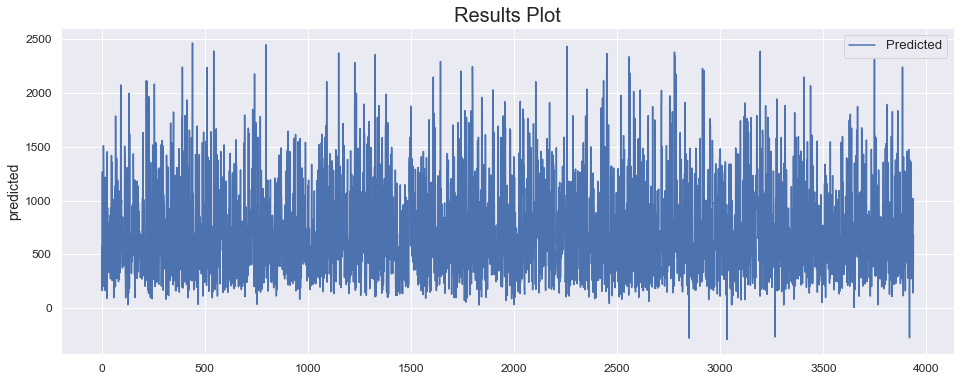

In [117]:
fig, ax = plt.subplots(figsize=(16,6))

sns.lineplot(x=prediction.index, y=prediction.predicted, data=prediction)
ax.set_title("Results Plot", size=20)
ax.legend(['Predicted'])
plt.show()

## K Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation, as shown in the Diagram below. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training. K-fold is also used for hyper-parameters selection that we will discuss later.

<img src="k-fold.png">

In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a `KFold` object that  Provides train/test indices to split data into train/test sets in an iterative manner.

`n_splits`:  A number of folds. Must be at least 2. Changed in version 0.22: n_splits default value changed from 3 to 5.

`shuffle`: Indicates whether to shuffle the data before splitting into batches. Note, the samples within each split will not be shuffled.

`random_state`: the random state.

In [118]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [119]:
lr_pred = cross_val_predict(lr, X, y, cv=kf, n_jobs=-1)

In [120]:
r2_score(y, lr_pred)

0.962750415537857

## Cross Validation Score

Now, let's use *Scikit-Learn's* *K-fold cross-validation* method to see whether we can assess the performance of our model. The *K-fold cross-validation* method splits the training set into the number of folds (n_splits), as now in the Diagram above, if we have K folds, K-1 is used for training and one fold is used for testing. The input parameters are as follows:

<b>estimator</b>: The object to use to `fit` the data.

<b>X</b>: array-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.

<b>y</b>: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.

<b>scoring</b>: A str or a scorer callable object/ function with signature scorer (estimator, X, y) which should return only a single value.  See model evaluation [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01#scoring-parameter) for more information.

The larger the fold, the better the model performance is, as we are using more samples for training; the variance also decreases.


In [121]:
cv = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='r2', cv=5)

In [122]:
cv.mean()

0.9658566873604653

In [123]:
cv.std()

0.013884241408593973

#### Python code done by Dennis Lam